In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
import sys
from scipy import interpolate
from glob import glob
from scipy.stats import gaussian_kde

In [2]:
root_dir = abspath(join(".."))
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import safe_mkdir

In [4]:
root_data_dir = join(root_dir, 'Data')
spectral_dir = join(root_data_dir, 'Color')
spectral_files = glob(join(spectral_dir, '*.hdf5'))
spectral_files.sort()
spectral_files

['/home2/s20321005/Thesis-Project/Data/Color/gaia_(-0.019)_(0.124).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.124)_(0.188).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.188)_(0.219).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.219)_(0.241).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.241)_(0.259).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.259)_(0.275).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.275)_(0.288).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.288)_(0.300).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.300)_(0.312).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.312)_(0.323).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.323)_(0.333).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.333)_(0.343).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.343)_(0.353).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/gaia_

In [5]:
comp_dir = join(root_data_dir, "Completeness")
comp_files = glob(join(comp_dir, "*.hdf5"))
comp_files.sort()
comp_files

['/home2/s20321005/Thesis-Project/Data/Completeness/comp_(-0.019)_(0.124).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.124)_(0.188).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.188)_(0.219).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.219)_(0.241).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.241)_(0.259).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.259)_(0.275).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.275)_(0.288).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.288)_(0.300).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.300)_(0.312).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.312)_(0.323).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.323)_(0.333).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Completeness/comp_(0.333)_(0.343).hdf5',
 '/home2/s20321005/Thesis-Project/Data/

In [6]:
data_dir = join(root_data_dir, 'Effective-Completeness')
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Completeness already exist. Good to go!


In [7]:
index = 0
df_comp = vaex.open(comp_files[index])
df_comp

#,j,comp
0,2.058080808080808,0.0
1,2.1742424242424243,0.0
2,2.2904040404040407,0.0
3,2.4065656565656566,0.0
4,2.5227272727272725,0.0
...,...,...
94,12.977272727272727,0.9119597249508841
95,13.093434343434343,0.9166259765625
96,13.20959595959596,0.9184727822580645
97,13.325757575757576,0.9141625459617091


<BarContainer object of 99 artists>

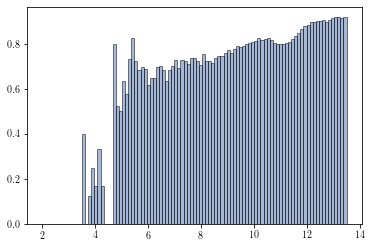

In [8]:
j = df_comp['j'].to_numpy()
dj = j[1] - j[0]
comp = df_comp['comp'].to_numpy()

plt.bar(j, comp, width=dj, alpha=0.5, edgecolor='k')

<BarContainer object of 99 artists>

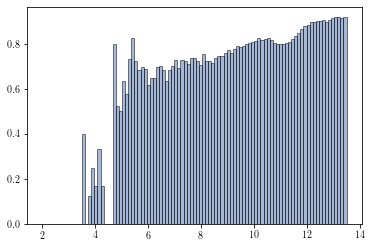

In [9]:
comp_interp = interpolate.interp1d(j, comp, kind='nearest-up', fill_value=0, bounds_error=False)

plt.bar(j, comp_interp(j), width=dj, alpha=0.5, edgecolor='k')

In [10]:
df_star = vaex.open(spectral_files[index])
# df_star = df_star.filter("abs(z) > 50").filter("abs(z) < 250")
# df_star = df_star.extract()
df_star

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.014884639099905679,-0.6277107372592441,8.755000114440918,8.656999588012695,AAA,2309518882743792512,23.22193717956543,22.29106181287425,0.015476686879992485,6.508986172951364,0.016319049522280693,4.789413549620276,0.020170677453279495,9.131726264953613,9.230249404907227,8.934432983398438,1889.544189453125,2443.355224609375,1.1517304182052612,1.167120337486267,2.951179464847555,-1.3351842543237686,208.5220947265625,204.33360290527344,210.59359741210938,0.003100000089034438,0.0010000000474974513,0.00570000009611249,nan,nan,nan,A,00032467-3557546,1,112,--,13.979635238647461,gaia,0.8730981349945068,0.8730981349945068,1.0,7851.72216796875,gspphot,7.68994140625,6.4814453125,0.0,4.14709997177124,gspphot,0.008999824523925781,0.014599800109863281,0.0,nan,--,nan,nan,nan,-1.2071000337600708,gspphot,0.004799962043762207,0.006800055503845215,0.0,0.12999999523162842,rave,nan,nan,-1.0,nan,--,nan,nan,nan,0.09800056606494414,2.156411807047792,208.79383031755194,-203.02519970723176,48.7404540655227,-8.415224816113692,-21.64352857182297,0.016011703235616633,0.015794447555597668,0.8730981349945068,-21.420227000145907,-8.328402885890153,-0.09155582963669412,-0.038488697266941825,-18.593699921256633,0.8492448485468144,-17.56504054597298,0.22240955574805651,15.671299950086627,0.21851120838760413,11.50231723983446,0.056570682463120345,0.9292047712455165,2.2688119225303867
1,0.004024327829370965,-0.524718735926011,8.343000411987305,8.354999542236328,AAA,2320850144638182912,18.953393936157227,18.804502513339813,0.03458862751722336,2.371033566905557,0.02992495708167553,4.294701538457557,0.03351640701293945,8.412426948547363,8.408456802368164,8.392923355102539,1768.0096435546875,2107.264404296875,0.963398277759552,1.1564381122589111,-2.8775599181995015,-1.370726365867913,235.02450561523438,232.80850219726562,238.05279541015625,0.11829999834299088,0.11500000208616257,0.12160000205039978,nan,nan,nan,B,00005533-3003510,1,111,--,1.1950876712799072,gaia,2.3559632301330566,2.3559632301330566,1.0,10387.2470703125,gspphot,32.06640625,29.04296875,0.0,4.2657999992370605,gspphot,0.007599830627441406,0.006599903106689453,0.0,nan,--,nan,nan,nan,-0.723800003528595,gspphot,0.026000022888183594,0.028299987316131592,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,-0.011999120806784336,1.5076653509596054,232.84505129060733,-228.2004156927306,46.27513574470115,-1.504207141911487,-18.893609391109436,0.03013230576967992,0.0344081437870144,2.3559632301330566,-20.852603542276118,-1.6601716763817702,-0.16710865068114122,-0.03569122831444206,-5.315451438905118,2.3092068990693377,-20.199140700387066,0.49603582548242686,19.932411630452375,0.4789364798558288,-3.6688447259730683,0.13395989028038782,0.4443500309446283,1.9154636418233322
2,0.009026668358389472,-0.5355582254185696,8.772000312805176,8.71500015258789,AAA,2314758575341270912,17.977792739868164,17.864330232092666,0.025747472420334816,2.016616365008992,0.025557175278663635,4.128791564649313,0.028444882482290268,8.970077514648438,9.006498336791992,8.880840301513672,1697.627685546875,1618.81640625,1.2997452020645142,1.158286690711975,-2.93590619117844,-1.3724033313064865,240.72329711914062,238.5511016845703,243.18719482421875,0.003000000026077032,0.000699999975040555,0.01049999

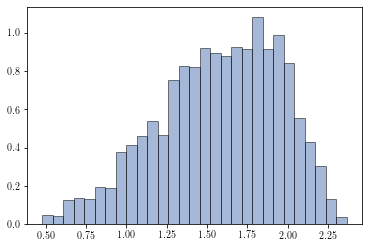

In [11]:
mj_sample = df_star['M_J'].to_numpy()
mj_edge = np.linspace(mj_sample.min(), mj_sample.max(), 30)
mj = (mj_edge[:-1]+mj_edge[1:])/2
rho_cmd, _ = np.histogram(mj_sample, bins=mj_edge, density=True)
dmj = mj_edge[1] - mj_edge[0]
plt.bar(mj, rho_cmd, width=dmj, alpha=0.5, edgecolor='k')
plt.show()

<BarContainer object of 29 artists>

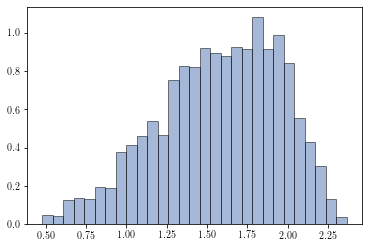

In [12]:
rho_interp = interpolate.interp1d(mj, rho_cmd, kind='nearest-up', fill_value=0, bounds_error=False)

plt.bar(mj, rho_interp(mj), width=dmj, alpha=0.5, edgecolor='k')

In [13]:
from scipy.stats import gaussian_kde

dm = np.linspace(-4, 15, 100)
Ddm = dm[1] - dm[0]
comp_dm = np.empty(len(dm))
for i, dm_i in enumerate(dm):
    comp_dm_i = np.sum(comp_interp(j)*rho_interp(j-dm_i))*dj
    comp_dm[i] = comp_dm_i

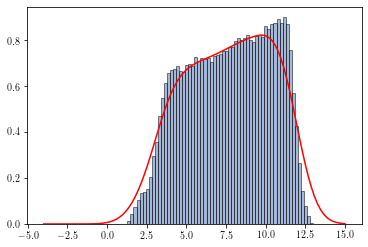

In [14]:
from scipy.stats import norm

def density(x, xi, wi, h=1):
    return np.sum(wi[:, None]*norm.pdf(x[None, :], xi[:, None], h), axis=0)
w = comp_dm/np.sum(comp_dm)
area = np.trapz(comp_dm, dm)

plt.bar(dm, comp_dm, width=Ddm, alpha=0.5, edgecolor='k')
plt.plot(dm, density(dm, dm, w, h=Ddm*5)*area, 'r-')
plt.show()

# For all 

comp_(-0.019)_(0.124).hdf5


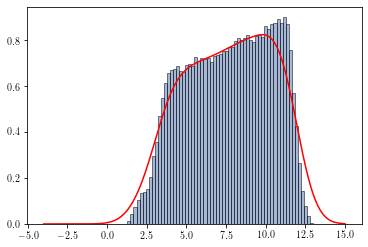

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.124)_(0.188).hdf5


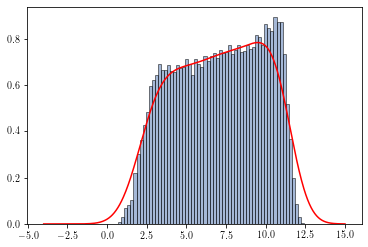

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.188)_(0.219).hdf5


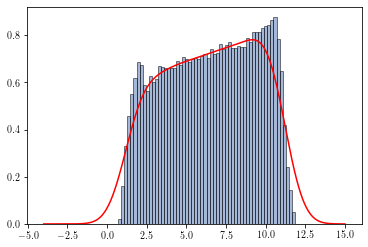

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.219)_(0.241).hdf5


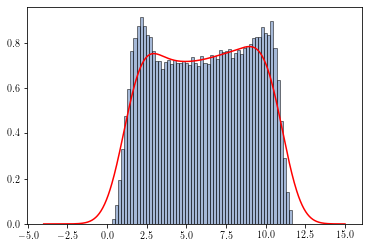

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.241)_(0.259).hdf5


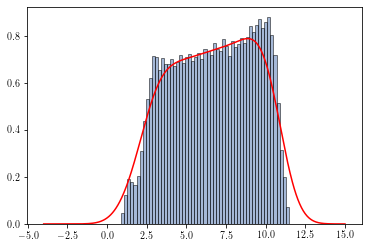

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.259)_(0.275).hdf5


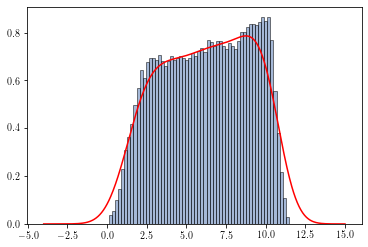

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.275)_(0.288).hdf5


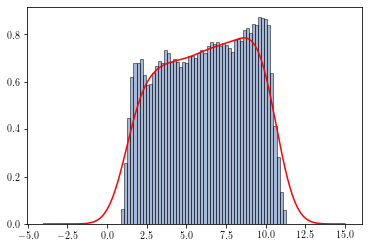

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.288)_(0.300).hdf5


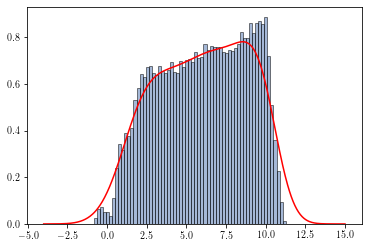

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.300)_(0.312).hdf5


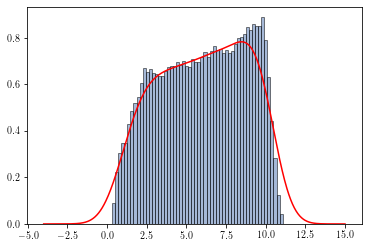

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.312)_(0.323).hdf5


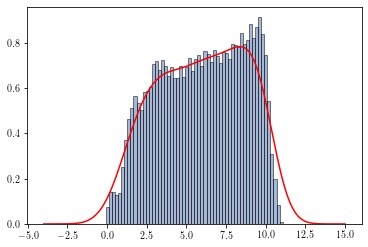

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.323)_(0.333).hdf5


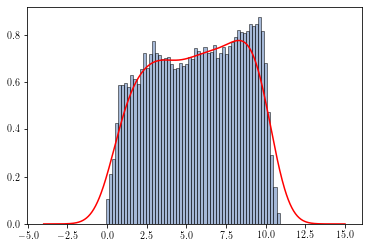

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.333)_(0.343).hdf5


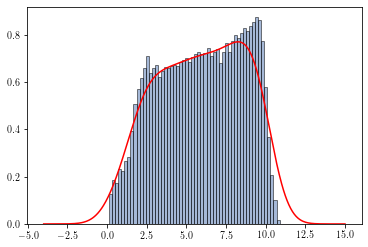

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.343)_(0.353).hdf5


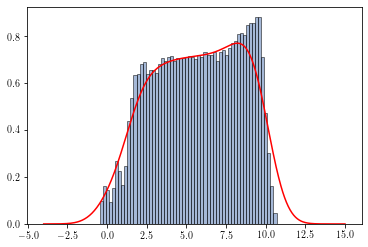

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.353)_(0.362).hdf5


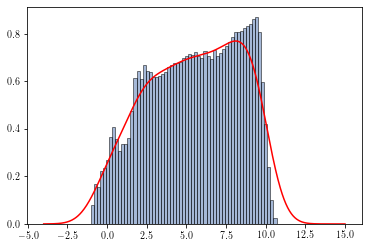

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 comp_(0.362)_(0.376).hdf5


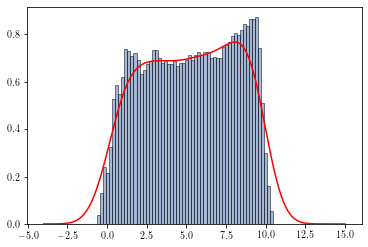

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

In [16]:
from scipy.stats import norm

def density(x, xi, wi, h=1):
    return np.sum(wi[:, None]*norm.pdf(x[None, :], xi[:, None], h), axis=0)

dm = np.linspace(-4, 15, 100)
Ddm = dm[1] - dm[0]
comp_dm = np.empty(len(dm))

for index, comp_file in enumerate(comp_files):
    name = comp_file.split('/')[-1]
    print(name)
    df_comp = vaex.open(comp_file)
    j = df_comp['j'].to_numpy()
    dj = j[1] - j[0]
    comp = df_comp['comp'].to_numpy()
    comp_interp = interpolate.interp1d(j, comp, kind='nearest-up', fill_value=0, bounds_error=False)

    df_star = vaex.open(spectral_files[index])
    # df_star = df_star.filter("abs(z) > 100").filter("abs(z) < 200")
    # df_star = df_star.extract()
    mj_sample = df_star['M_J'].to_numpy()
    mj_edge = np.linspace(mj_sample.min(), mj_sample.max(), 30)
    mj = (mj_edge[:-1]+mj_edge[1:])/2
    rho_cmd, _ = np.histogram(mj_sample, bins=mj_edge, density=True)
    dmj = mj_edge[1] - mj_edge[0]
    rho_interp = interpolate.interp1d(mj, rho_cmd, kind='nearest-up', fill_value=0, bounds_error=False)

    
    for i, dm_i in enumerate(dm):
        comp_dm_i = np.sum(comp_interp(j)*rho_interp(j-dm_i))*dj
        comp_dm[i] = comp_dm_i
    w = comp_dm/np.sum(comp_dm)
    area = np.trapz(comp_dm, dm)

    plt.bar(dm, comp_dm, width=Ddm, alpha=0.5, edgecolor='k')
    dmx = np.linspace(-4, 15, 500)
    plt.plot(dmx, density(dmx, dm, w, h=dj*8)*area, 'r-')
    plt.show()
    df = vaex.from_arrays(dm=dm, comp=density(dm, dm, w, h=dj*8)*area)
    df.export(join(data_dir, name), progress=True)
    # break

In [17]:
data_dir

'/home2/s20321005/Thesis-Project/Data/Effective-Completeness'